In [40]:
#imports
import numpy as np
from a2_utils import *
import cv2
from matplotlib import pyplot as plt
import math

In [41]:
#going to need this eventually...
import os
# os.chdir("C:/Users/Ziga/OneDrive - Univerza v Ljubljani/3. letnik/UZ/labs/assignment2")

### Exercise 1: Convolution

#### (a)
-> glej OneNote

#### (b)

In [42]:
def simple_convolution(I, k, N=-1, p=False):
    """
        I : signal
        k : kernel (of size 2*N + 1)
        N : N
        p : do padding?
    """
    #calculate N if not given
    if N == -1:
        N = int((len(k)-1) / 2)

    #do padding if requested
    if(p):
        out=np.copy(I)
        I = np.concatenate((np.zeros(N), I, np.zeros(N)))
    else:
        out = np.copy(I[N:len(I) - N])

    #ignoring the edges and only calculating for i = N ... (|I| - N - 1)
    for i in range(N, len(I) - N):
        t_sum = 0
        for j in range(-N, N+1):
            t_sum += k[j+N] * I[i-j]
        out[i-N] = t_sum
    
    return out

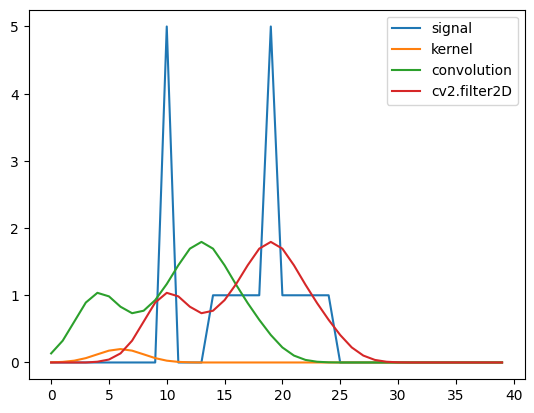

In [43]:
#testing b

signal = read_data("./signal.txt")
kernel = read_data("./kernel.txt")
convolution = simple_convolution(signal, kernel)
cv2_result = cv2.filter2D(signal, -1, kernel)

# print("Signal({}): \n{}\nKernel({}): \n{}\nConvolution({}): \n{}\ncv2.filter2D({}): \n{}\n".format(len(signal),signal,len(kernel),kernel,len(convolution),convolution,len(cv2_result),cv2_result))

plt_x = np.arange(len(signal))
plt_kernel = np.concatenate((kernel, np.zeros(len(signal)-len(kernel)))) #expand kernel to the dimension of signal so they fit on the same graph
plt_convolution = np.concatenate((convolution, np.zeros(len(signal)-len(convolution))))
plt.plot(plt_x , signal, label="signal")
plt.plot(plt_x, plt_kernel, label="kernel")
plt.plot(plt_x, plt_convolution, label="convolution")
plt.plot(plt_x, cv2_result, label="cv2.filter2D")
plt.legend()
plt.show()

In [44]:
np.sum(kernel)

0.9999999974

#### (c)

Signal(40): /n[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 1. 1. 1. 1. 1. 5. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]/nKernel(13): /n[0.0022182  0.00877313 0.02702316 0.06482518 0.12110939 0.17621312
 0.19967563 0.17621312 0.12110939 0.06482518 0.02702316 0.00877313
 0.0022182 ]/nConvolution(40): /n[0.         0.         0.         0.         0.01109098 0.04386567
 0.13511579 0.32412592 0.60776515 0.89205693 1.03639264 0.98390527
 0.82949601 0.73316089 0.77004614 0.92800924 1.16755204 1.44642307
 1.69386115 1.79426613 1.69386115 1.44642307 1.15646106 0.88414357
 0.63493035 0.40903497 0.22394906 0.10283967 0.03801449 0.01099133
 0.0022182  0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]/ncv2.filter2D(40): /n[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.01109098]
 [0.04386567]
 [0.13511579]
 [0.32412592]
 [0.60776515]
 [0.89205693]
 [1.03639264]
 [0.98390527]
 [0.82949601]
 [0.73316089]
 [0.77004614]
 [0.928009

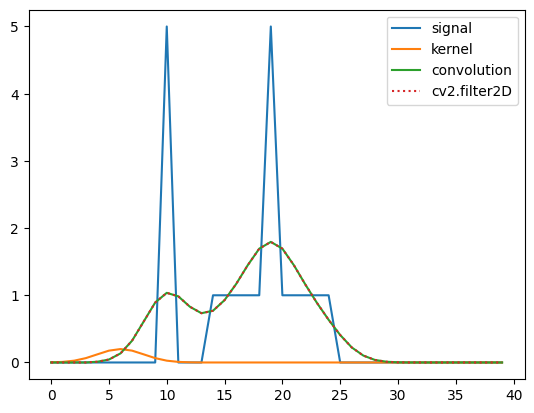

In [45]:
#testing c

signal = read_data("./signal.txt")
kernel = read_data("./kernel.txt")
convolution = simple_convolution(signal, kernel, p=True)
cv2_result = cv2.filter2D(signal, -1, kernel)

print("Signal({}): /n{}/nKernel({}): /n{}/nConvolution({}): /n{}/ncv2.filter2D({}): /n{}/n".format(len(signal),signal,len(kernel),kernel,len(convolution),convolution,len(cv2_result),cv2_result))

plt_x = np.arange(len(signal))
plt_kernel = np.concatenate((kernel, np.zeros(len(signal)-len(kernel))))
plt.plot(plt_x , signal, label="signal")
plt.plot(plt_x, plt_kernel, label="kernel")
plt.plot(plt_x, convolution, label="convolution")
plt.plot(plt_x, cv2_result, label="cv2.filter2D", linestyle=":")
plt.legend()
plt.show()

#### (d)

In [46]:
def gauss(sigma):
    #determine size
    size = 2 * math.ceil((3 * sigma)) + 1

    #generate the values for calculation
    vals = np.arange(-(size//2),size//2+1)
    #vals = np.arange(-size, size+1)

    #calculate the kernel
    kernel = (1 / math.sqrt(2 * math.pi) * sigma) * np.exp(-((vals**2) / (2 * sigma**2)))

    #normalize kernel
    kernel = kernel / np.sum(kernel)
    
    #return
    return kernel, size//2

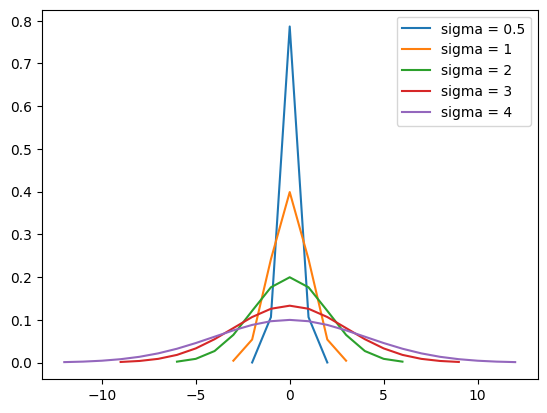

In [47]:
#testing d
gauss_k_05, size_05 = gauss(0.5)
gauss_k_1, size_1 = gauss(1)
gauss_k_2, size_2 = gauss(2)
gauss_k_3, size_3 = gauss(3)
gauss_k_4, size_4 = gauss(4)


plt.plot(np.arange(-size_05, size_05+1), gauss_k_05, label="sigma = 0.5")
plt.plot(np.arange(-size_1, size_1+1), gauss_k_1, label="sigma = 1")
plt.plot(np.arange(-size_2, size_2+1), gauss_k_2, label="sigma = 2")
plt.plot(np.arange(-size_3, size_3+1), gauss_k_3, label="sigma = 3")
plt.plot(np.arange(-size_4, size_4+1), gauss_k_4, label="sigma = 4")
plt.legend()
plt.show()

#### (e)

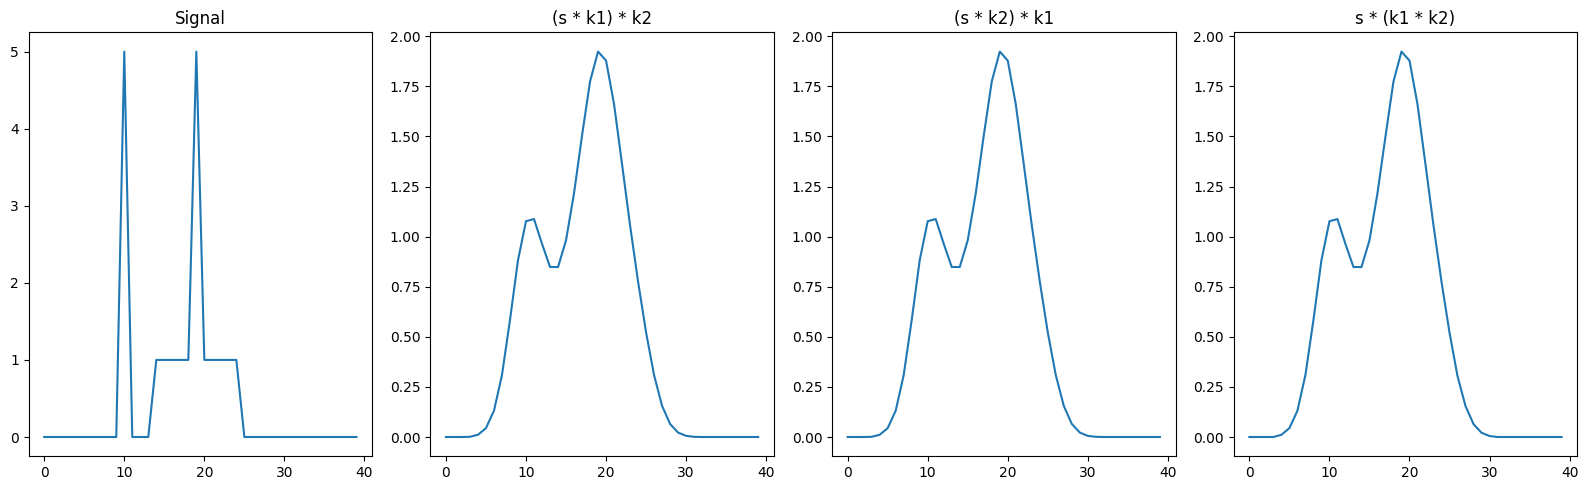

In [48]:
signal = read_data("./signal.txt")

#case 1: 2 consecutive convolutions
k1 = gauss(2)[0]
k2 = [0.1, 0.6, 0.4]
convolution_1 = simple_convolution(signal, k1, p=True)
convolution_1 = simple_convolution(convolution_1, k2, p=True)

#case 2: 2 consecutive convolutions, switched order
convolution_2 = simple_convolution(signal, k2, p=True)
convolution_2 = simple_convolution(convolution_2, k1, p=True)

#case 3: convolution with convolution of kernels
k3 = simple_convolution(k1, k2, p=True)
convolution_3 = simple_convolution(signal, k3, p=True)

plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 1)
plt.plot(np.arange(len(signal)), signal)
plt.title("Signal")
plt.subplot(1, 4, 2)
plt.plot(np.arange(len(convolution_1)), convolution_1)
plt.title("(s * k1) * k2")
plt.subplot(1, 4, 3)
plt.plot(np.arange(len(convolution_2)), convolution_2)
plt.title("(s * k2) * k1")
plt.subplot(1, 4, 4)
plt.plot(np.arange(len(convolution_3)), convolution_3)
plt.title("s * (k1 * k2)")
plt.tight_layout()
plt.show()


All orders of operations produce the same result.

### Exercise 2: Image filtering

#### (a)

In [49]:
def gaussfilter(image, sigma):
    """
        image : input image
        sigma : sigma parameter for generation of Gaussian filter
    """

    #generate gaussian kernel
    gauss_kernel = np.array([gauss(sigma)[0]]) #dont forget that the function returns a tuple of the kernel and N, hence this indexing

    #filter along the first dimension
    result = cv2.filter2D(image, -1, gauss_kernel)

    #convolve with transposed kernel
    result = cv2.filter2D(result, -1, gauss_kernel.T)
    
    #return
    return result

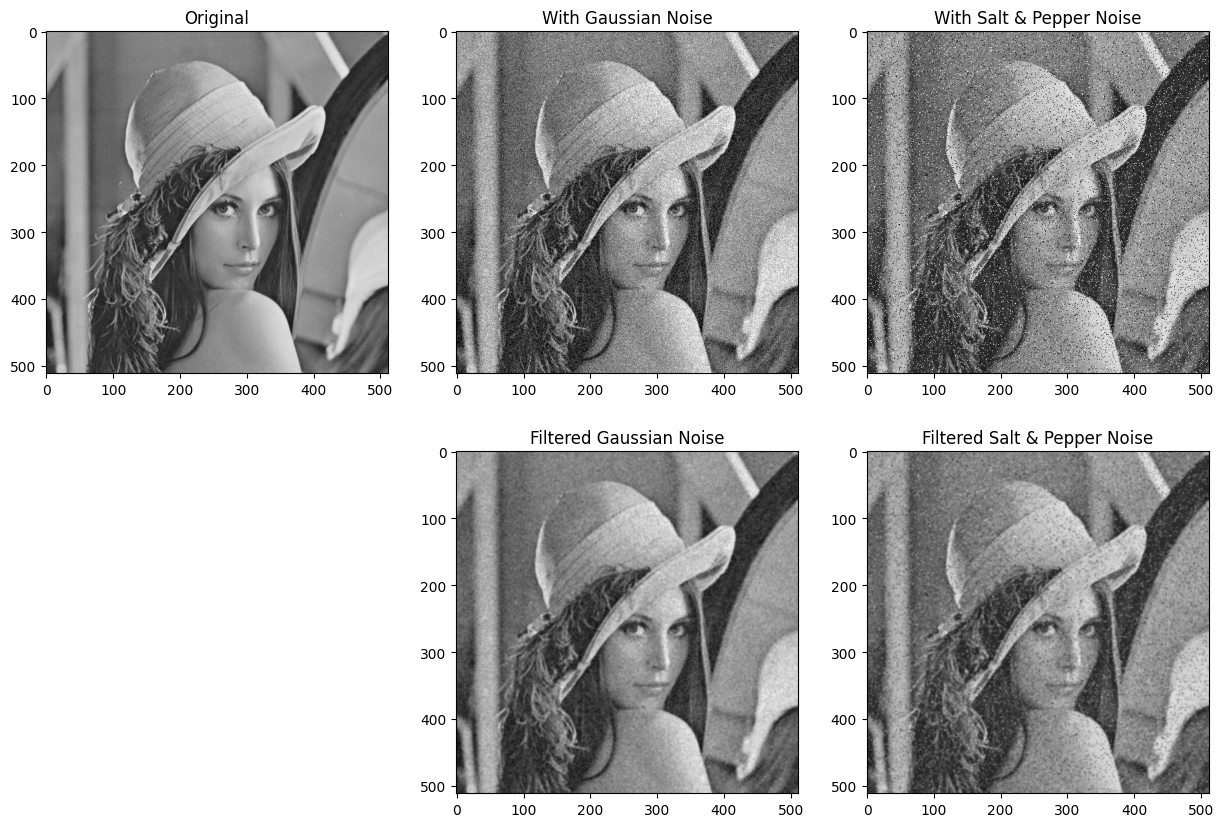

In [50]:
#testing a

#read lena image
lena = cv2.imread("./images/lena.png", cv2.IMREAD_GRAYSCALE)
#adapt for a2_utils
lena = lena/255

#introduce corruption
corruption_magnitude = 0.1
lena_gauss_noise = gauss_noise(lena, corruption_magnitude)
lena_sp_noise =  sp_noise(lena, corruption_magnitude)

#filter
filter_kernel_sigma = 1
lena_gauss_filtered = gaussfilter(lena_gauss_noise, filter_kernel_sigma)
lena_sp_filtered = gaussfilter(lena_sp_noise, filter_kernel_sigma)

#plot
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(lena, cmap="grey", vmin=0, vmax=1)
plt.title("Original")
plt.subplot(2,3,2)
plt.imshow(lena_gauss_noise, cmap="grey", vmin=0, vmax=1)
plt.title("With Gaussian Noise")
plt.subplot(2,3,3)
plt.imshow(lena_sp_noise, cmap="grey", vmin=0, vmax=1)
plt.title("With Salt & Pepper Noise")
plt.subplot(2,3,5)
plt.imshow(lena_gauss_filtered, cmap="grey", vmin=0, vmax=1)
plt.title("Filtered Gaussian Noise")
plt.subplot(2,3,6)
plt.imshow(lena_sp_filtered, cmap="grey", vmin=0, vmax=1)
plt.title("Filtered Salt & Pepper Noise")
plt.show()

#### (b)

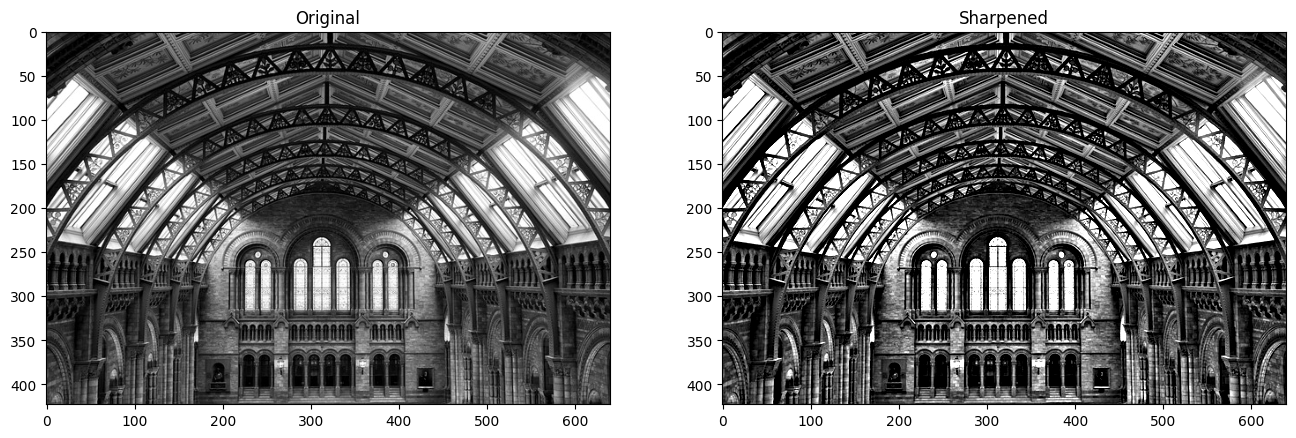

In [51]:
museum = cv2.imread("./images/museum.jpg", cv2.IMREAD_GRAYSCALE)
museum = museum/255

museum_sharp = (museum * 2) - gaussfilter(museum, 8)
# museum_sharp = museum_sharp + abs(np.min(museum_sharp))
# museum_sharp = museum_sharp / np.max(museum_sharp)
# museum_sharp = gaussfilter(museum, 5)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(museum, cmap="gray", vmin=0, vmax=1)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(museum_sharp, cmap="gray", vmin=0, vmax=1)
plt.title("Sharpened")
plt.show()
# print("original: ", np.min(museum), np.max(museum))
# print("sharp: ", np.min(museum_sharp), np.max(museum_sharp))

#### (c)

In [52]:
def simple_median(I, w):
    """
        I : input image
        w : filter width
    """
    
    result = np.copy(I)
    offset = w//2

    for i in range(len(I)):
        left_border = i-offset if i-offset >= 0 else 0
        right_border = i+offset+1 if i+offset+1 <= len(I) else len(I)
        cutout = I[left_border:right_border]
        result[i] = np.median(cutout)

    return result

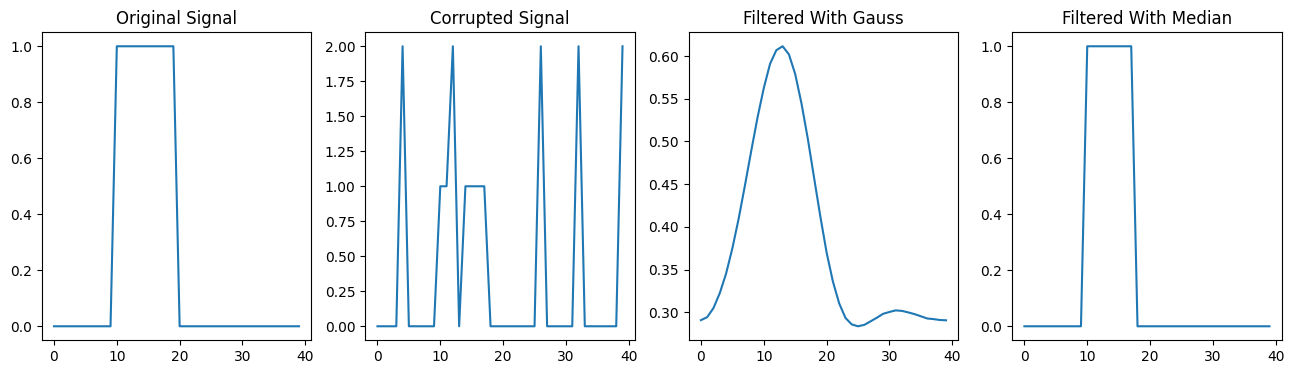

In [76]:
#testing c

#generate signal
signal = np.zeros(40)
signal[10:20] = 1

#corrupt signal
signal_sp = np.copy(signal)
signal_sp[np.random.rand(signal.shape[0]) < 0.3 / 2] = np.random.randint(1,3)
signal_sp[np.random.rand(signal.shape[0]) < 0.3 / 2] = 0

#filtering
signal_gauss_filter = gaussfilter(signal_sp, 5)
signal_median_filter = simple_median(signal_sp, 5)

#plot
plt_x = np.arange(len(signal))
plt.figure(figsize=(16,4))
num_subplts = 4
plt.subplot(1,num_subplts,1)
plt.plot(plt_x, signal)
plt.title("Original Signal")
plt.subplot(1,num_subplts,2)
plt.plot(plt_x, signal_sp)
plt.title("Corrupted Signal")
plt.subplot(1,num_subplts,3)
plt.plot(plt_x, signal_gauss_filter)
plt.title("Filtered With Gauss")
plt.subplot(1,num_subplts,4)
plt.plot(plt_x, signal_median_filter)
plt.title("Filtered With Median")
plt.show()

#### (d)

In [54]:
def median_2d(I, w):
    """
        I : input image
        w : filter width
    """
    
    result = np.copy(I)
    offset = w//2

    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            left_border_i = i-offset if i-offset >= 0 else 0
            right_border_i = i+offset+1 if i+offset+1 <= I.shape[0] else I.shape[0]
            top_border_j = j-offset if j-offset >= 0 else 0
            bottom_border_j = j+offset+1 if j+offset+1 <= I.shape[1] else I.shape[1]

            cutout = I[top_border_j:bottom_border_j, left_border_i:right_border_i]
            result[j][i] = np.median(cutout)

    return result

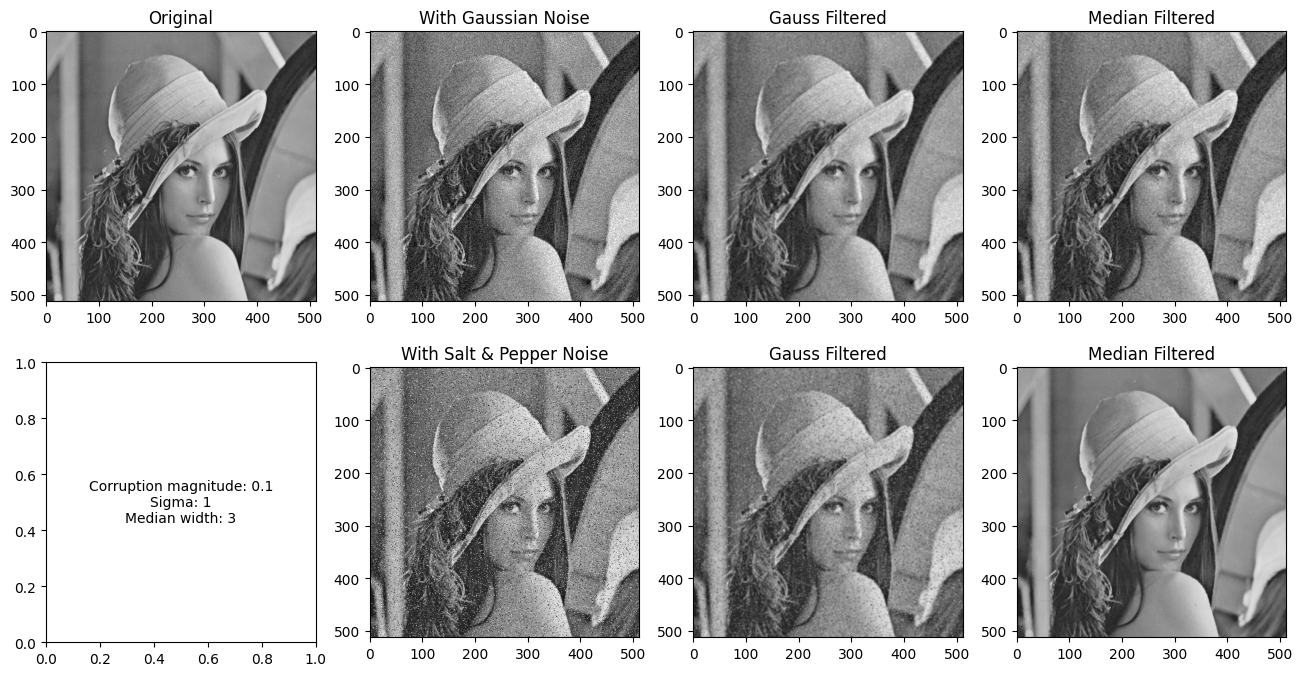

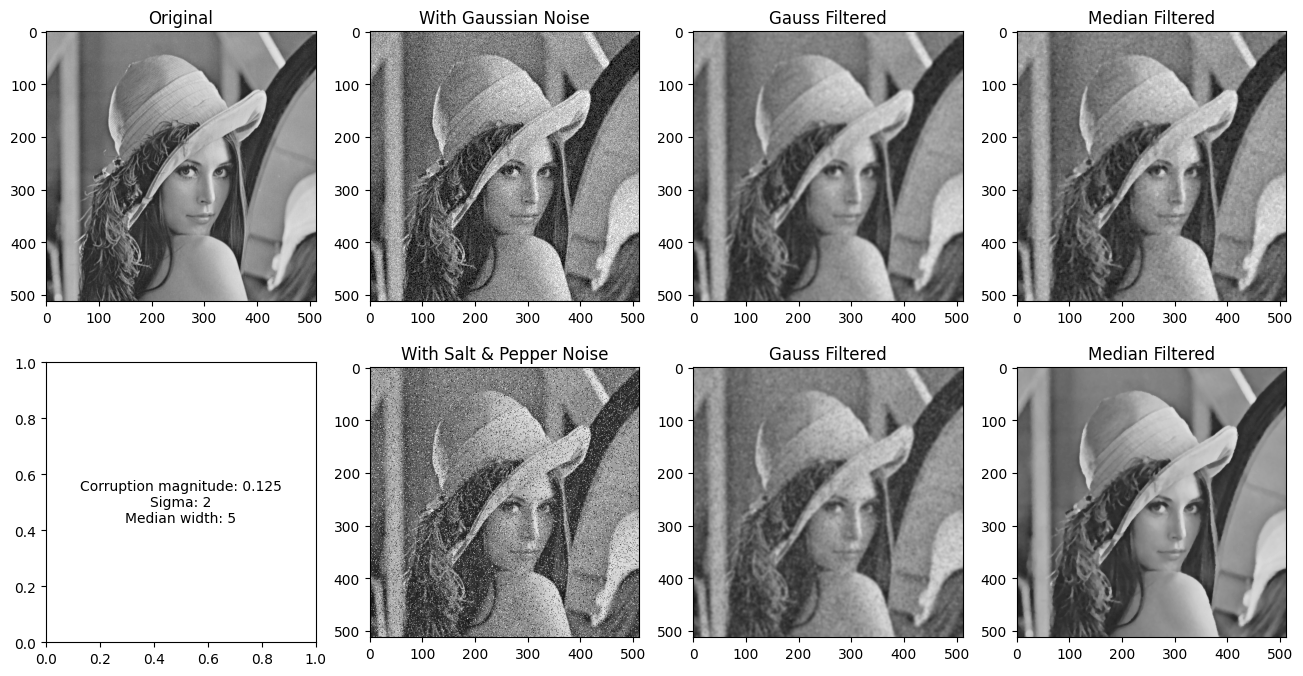

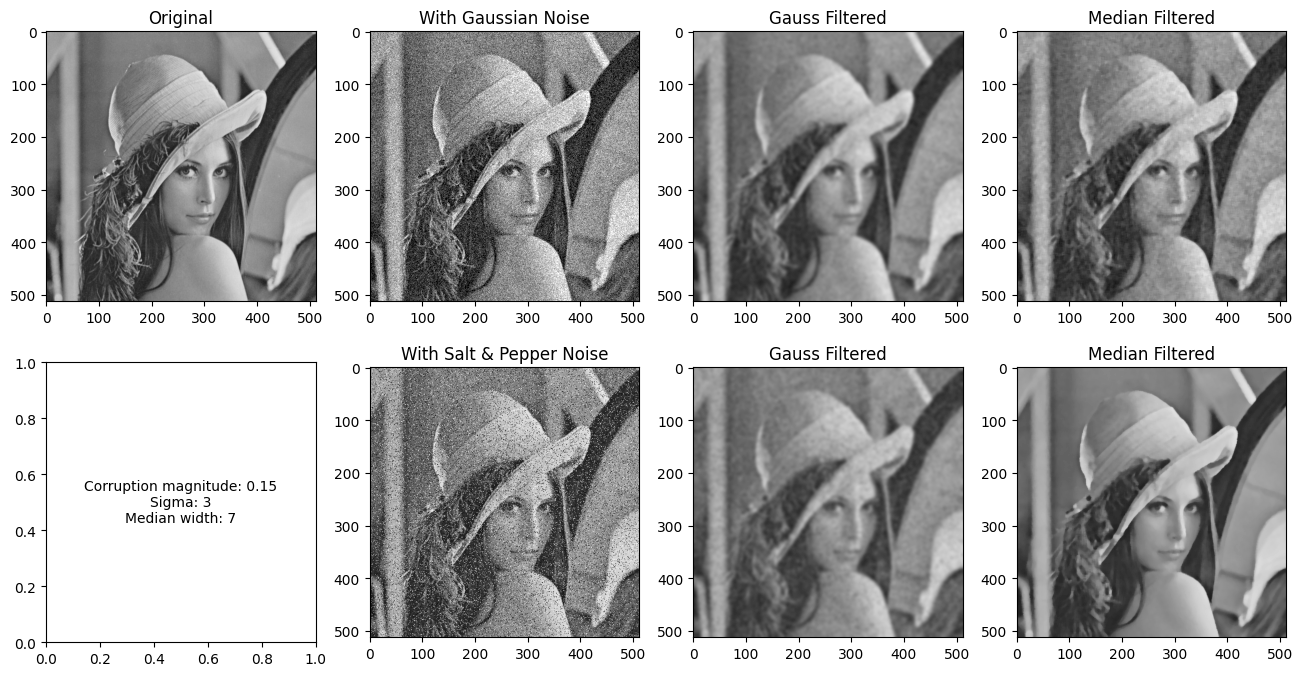

In [73]:
lena = cv2.imread("./images/lena.png", cv2.IMREAD_GRAYSCALE)
lena = lena/255
params = [(0.1,1,3), (0.125,2,5), (0.15,3,7)]
for p in params:
    corruption_magnitude, filter_kernel_sigma, filter_median_width = p
    #introduce corruption
    # corruption_magnitude = 0.2
    lena_gauss_noise = gauss_noise(lena, corruption_magnitude)
    lena_sp_noise =  sp_noise(lena, corruption_magnitude)

    #filter
    # filter_kernel_sigma = 1
    lena_gauss_filtered = gaussfilter(lena_gauss_noise, filter_kernel_sigma)
    lena_sp_filtered = gaussfilter(lena_sp_noise, filter_kernel_sigma)
    # filter_median_width = 7
    lena_gauss_med_filt = median_2d(lena_gauss_noise, filter_median_width)
    lena_sp_med_filt = median_2d(lena_sp_noise, filter_median_width)

    #plot
    plt.figure(figsize=(16,8))
    plt.subplot(2,4,1)
    plt.imshow(lena, cmap="grey", vmin=0, vmax=1)
    plt.title("Original")
    plt.subplot(2,4,2)
    plt.imshow(lena_gauss_noise, cmap="grey", vmin=0, vmax=1)
    plt.title("With Gaussian Noise")
    plt.subplot(2,4,6)
    plt.imshow(lena_sp_noise, cmap="grey", vmin=0, vmax=1)
    plt.title("With Salt & Pepper Noise")
    plt.subplot(2,4,3)
    plt.imshow(lena_gauss_filtered, cmap="grey", vmin=0, vmax=1)
    plt.title("Gauss Filtered")
    plt.subplot(2,4,7)
    plt.imshow(lena_sp_filtered, cmap="grey", vmin=0, vmax=1)
    plt.title("Gauss Filtered")
    plt.subplot(2,4,4)
    plt.imshow(lena_gauss_med_filt, cmap="grey", vmin=0, vmax=1)
    plt.title("Median Filtered")
    plt.subplot(2,4,8)
    plt.imshow(lena_sp_med_filt, cmap="grey", vmin=0, vmax=1)
    plt.title("Median Filtered")
    plt.subplot(2,4,5)
    plt.text(0.5, 0.5, "Corruption magnitude: {}\nSigma: {}\nMedian width: {}".format(corruption_magnitude, filter_kernel_sigma, filter_median_width), ha='center', va='center')
    plt.show()

#### (e)

In [56]:
def laplacefilter(I, sigma):
    """
        I : input image (grayscale)
        sigma : sigma for gaussian
    """
    I_gauss = gaussfilter(I, sigma)
    laplace_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    result = cv2.filter2D(I_gauss, -1, laplace_kernel)

    return result

In [57]:
def laplacefilter(I, sigma):
    result = np.copy(I)
    result = result - gaussfilter(I,sigma)
    return result

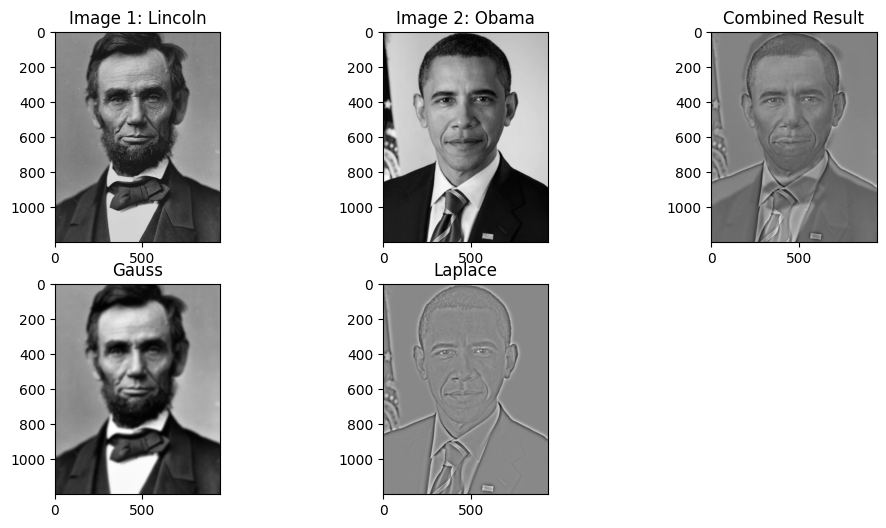

In [58]:
lincoln = cv2.imread("./images/lincoln.jpg", cv2.IMREAD_GRAYSCALE)
obama = cv2.imread("./images/obama.jpg", cv2.IMREAD_GRAYSCALE)

lincoln = lincoln/255
obama = obama/255

lincoln_gauss = gaussfilter(lincoln, 5)
lincoln_gauss = lincoln_gauss / np.max(lincoln_gauss)
obama_laplace = laplacefilter(obama.astype(np.float64), 10)
obama_laplace = obama_laplace / np.max(obama_laplace)

weight = 0.4
combined = lincoln_gauss*weight + obama_laplace*(1-weight)

plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
plt.imshow(lincoln, cmap="gray")
plt.title("Image 1: Lincoln")
plt.subplot(2,3,2)
plt.imshow(obama, cmap="gray")
plt.title("Image 2: Obama")
plt.subplot(2,3,4)
plt.imshow(lincoln_gauss, cmap="gray")
plt.title("Gauss")
plt.subplot(2,3,5)
plt.imshow(obama_laplace, cmap="gray")
plt.title("Laplace")
plt.subplot(2,3,3)
plt.imshow(combined, cmap="gray")
plt.title("Combined Result")
plt.show()

### Exercise 3: Global approach to image description

#### (a)

In [59]:
def myhist3(image,n_bins,colormode):
    """
        image : input image
        n_bins : number of bins
        colormode : color mode/model used in the image
    """

    #resolve colormode if necessary
    if(colormode == "RGB"): pass
    elif(colormode == "BGR"): image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif(colormode == "HSV"): image = image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    elif(colormode == "Lab"): image = cv2.cvtColor(image, cv2.COLOR_Lab2RGB)

    #prepare
    H = np.zeros((n_bins,n_bins,n_bins))
    image_unrolled = image.reshape((-1,3))
    bins = np.linspace(0,255, num=n_bins)
    
    #iterate over pixels
    for pix in image_unrolled:
        r_bin = np.digitize(pix[0], bins) -1
        g_bin = np.digitize(pix[1], bins) -1
        b_bin = np.digitize(pix[2], bins) -1
        # TIL np.digitize starts indexing with 1  
        #last bin is right closed
        r_bin = r_bin - 1 if r_bin == n_bins else r_bin
        g_bin = g_bin - 1 if g_bin == n_bins else g_bin
        b_bin = b_bin - 1 if b_bin == n_bins else b_bin
        H[r_bin,g_bin,b_bin] += 1
    
    #normalize
    H = H / len(image_unrolled)

    return H
    

In [60]:
# lena_color = cv2.imread("./images/lena.png")
# lena_color = cv2.cvtColor(lena_color, cv2.COLOR_BGR2RGB)

# bins = 10
# hist1 = myhist3(lena_color, bins, "RGB")
# # hist2 = myhist3_s(bins, lena_color, "rgb")
# hist2 = cv2.calcHist(lena_color, [0,1,2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
# hist2 = hist2/hist2.sum()

# fig = plt.figure(figsize=(10, 8))
# ax1 = fig.add_subplot(121, projection='3d')
# x1, y1, z1 = np.meshgrid(range(bins), range(bins), range(bins))
# ax1.scatter(x1.ravel(), y1.ravel(), z1.ravel(), c=hist1.flatten(), marker='o', s=5)
# ax1.set_title('hist1')
# ax1.set_xlabel('Red')
# ax1.set_ylabel('Green')
# ax1.set_zlabel('Blue')
# ax2 = fig.add_subplot(122, projection='3d')
# x2, y2, z2 = np.meshgrid(range(bins), range(bins), range(bins))
# ax2.scatter(x2.ravel(), y2.ravel(), z2.ravel(), c=hist2.flatten(), marker='o', s=5)
# ax2.set_title('hist2')
# ax2.set_xlabel('Red')
# ax2.set_ylabel('Green')
# ax2.set_zlabel('Blue')
# plt.show()

# print(lena_color)
# print("-----------------")
# print(lena_color.reshape((-1,3)))


#### (b)

In [61]:
def compare_histograms(h1, h2, measure):
    """
        h1 : histogram 1
        h2 : histogram 2
        measure : chosen distance measure
    """
    result = -1

    if(measure=="l2"):
        result = np.sqrt(np.sum((h1-h2)**2))
    elif(measure=="chi-square"):
        result = 0.5 * np.sum(
            ((h1-h2)**2)
            /
            (h1+h2+1e-10)
        )
    elif(measure=="intersection"):
        result = 1 - np.sum(
            np.minimum(h1,h2)
        )
    elif(measure=="hellinger"):
        result = np.sqrt(
            0.5 * 
            np.sum(
                (np.sqrt(h1) - np.sqrt(h2))**2
            )
        )
    
    return result

#### (c)

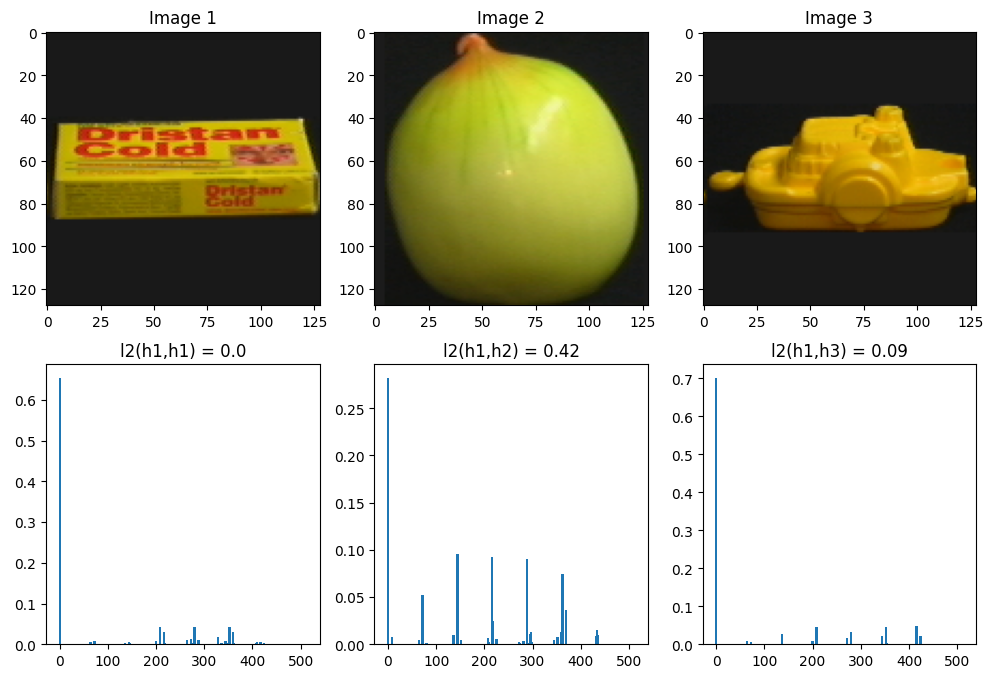

In [62]:
#open images
image1 = cv2.imread("./dataset/object_01_1.png")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread("./dataset/object_02_1.png")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.imread("./dataset/object_03_1.png")
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

#compute histograms
hist_img1 = myhist3(image1,8,"RGB")
hist_img2 = myhist3(image2,8,"RGB")
hist_img3 = myhist3(image3,8,"RGB")

#reshape in to 1D
hist_img1_1d = hist_img1.reshape(-1)
hist_img2_1d = hist_img2.reshape(-1)
hist_img3_1d = hist_img3.reshape(-1)

#distances
dist_method = "l2"
l2_1_1 = compare_histograms(hist_img1_1d, hist_img1_1d, dist_method)
l2_1_2 = compare_histograms(hist_img1_1d, hist_img2_1d, dist_method)
l2_1_3 = compare_histograms(hist_img1_1d, hist_img3_1d, dist_method)

#plot
line_width = 5 # TIL that sometimes lines dont get draw despite the value being there if they are too thin / too crammed
plt.figure(figsize=(12,8))
#img1
plt.subplot(2,3,1)
plt.imshow(image1)
plt.title("Image 1")
#img2
plt.subplot(2,3,2)
plt.imshow(image2)
plt.title("Image 2")
#img3
plt.subplot(2,3,3)
plt.imshow(image3)
plt.title("Image 3")
#hist1
plt.subplot(2,3,4)
plt.bar(range(len(hist_img1_1d)), hist_img1_1d, width=line_width)
plt.title("{}(h1,h1) = {}".format(dist_method,round(l2_1_1,2)))
#hist2
plt.subplot(2,3,5)
plt.bar(range(len(hist_img2_1d)), hist_img2_1d, width=line_width)
plt.title("{}(h1,h2) = {}".format(dist_method,round(l2_1_2,2)))
#hist3
plt.subplot(2,3,6)
plt.bar(range(len(hist_img3_1d)), hist_img3_1d, width=line_width)
plt.title("{}(h1,h3) = {}".format(dist_method,round(l2_1_3,2)))
plt.show()

#### (d)

In [63]:
def img_retrieval(dir, bins):
    """
        dir : directory name
        bins : number of bins for histogram
    """
    #declare main data struct
    objects_data = {}

    #iterate over file names in dir
    for filename in os.listdir(dir):
        #init object data struct
        object_instance = {
            #"filename" : filename, #self-explanatory
            "image" : None, #image matrix
            "hist3d" : None, #3D histogram
            "hist1d" : None #histogram transformed to 1d array
        }
        #read image
        object_instance["image"] = cv2.imread(dir+filename)
        object_instance["image"] = cv2.cvtColor(object_instance["image"], cv2.COLOR_BGR2RGB)
        #compute 3d hist
        object_instance["hist3d"] = myhist3(object_instance["image"],bins,"RGB")
        #transform hist to 1d array
        object_instance["hist1d"] = object_instance["hist3d"].reshape(-1)
        #append to main data structure
        #objects_data.append(object_instance)
        objects_data[filename] = object_instance
    
    #return
    return objects_data

In [89]:
#this is in its own cell because the calculation (at least in a jupyter notebook) takes ~20-30s
histograms_data = img_retrieval("./dataset/", 8)

In [90]:
selected_image = "object_05_4.png" 

#init new dict with same keys - file names - but for holding distances to the selected image
distances_from_selected = dict.fromkeys(histograms_data)
#iterate over the file names and for each file compute all distances to the selected file
for filename in distances_from_selected:
    #init struct for distances for this instance
    distances_object = {
        "l2" : -1,
        "chi-square" : -1,
        "intersection" : -1,
        "hellinger" : -1
    }
    #this could be in a for loop over the method names, but i feel like this way is more readable and its already spaghetti
    distances_object["l2"] = compare_histograms(histograms_data[selected_image]["hist1d"], histograms_data[filename]["hist1d"], "l2")
    distances_object["chi-square"] = compare_histograms(histograms_data[selected_image]["hist1d"], histograms_data[filename]["hist1d"], "chi-square")
    distances_object["intersection"] = compare_histograms(histograms_data[selected_image]["hist1d"], histograms_data[filename]["hist1d"], "intersection")
    distances_object["hellinger"] = compare_histograms(histograms_data[selected_image]["hist1d"], histograms_data[filename]["hist1d"], "hellinger")
    #put it in the main struct
    distances_from_selected[filename] = distances_object




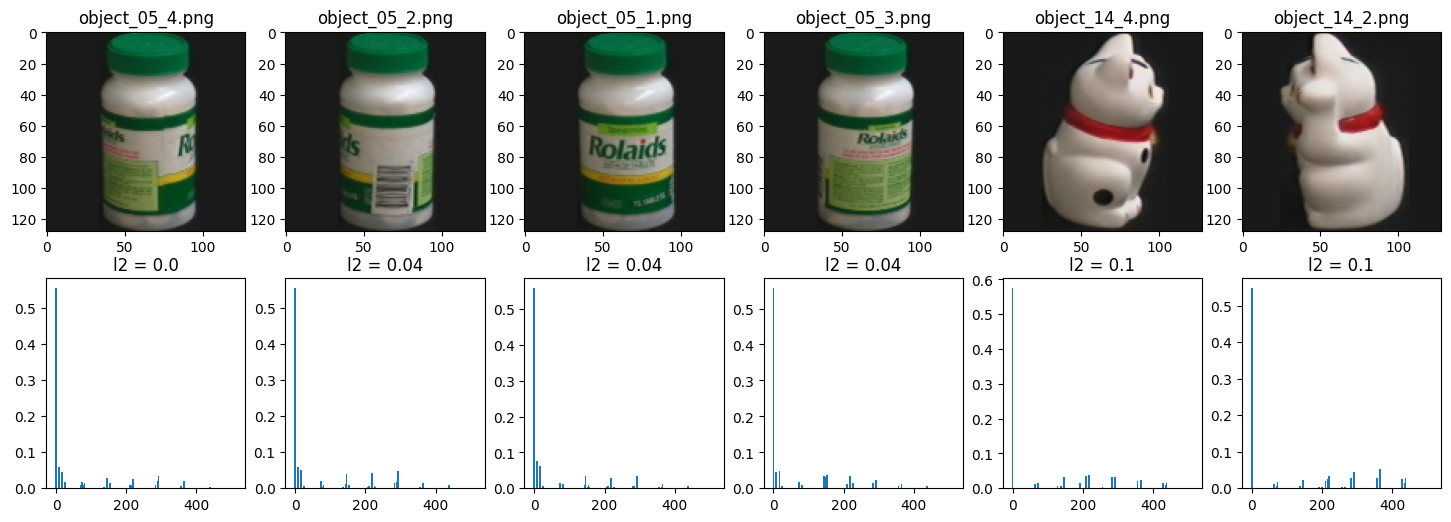

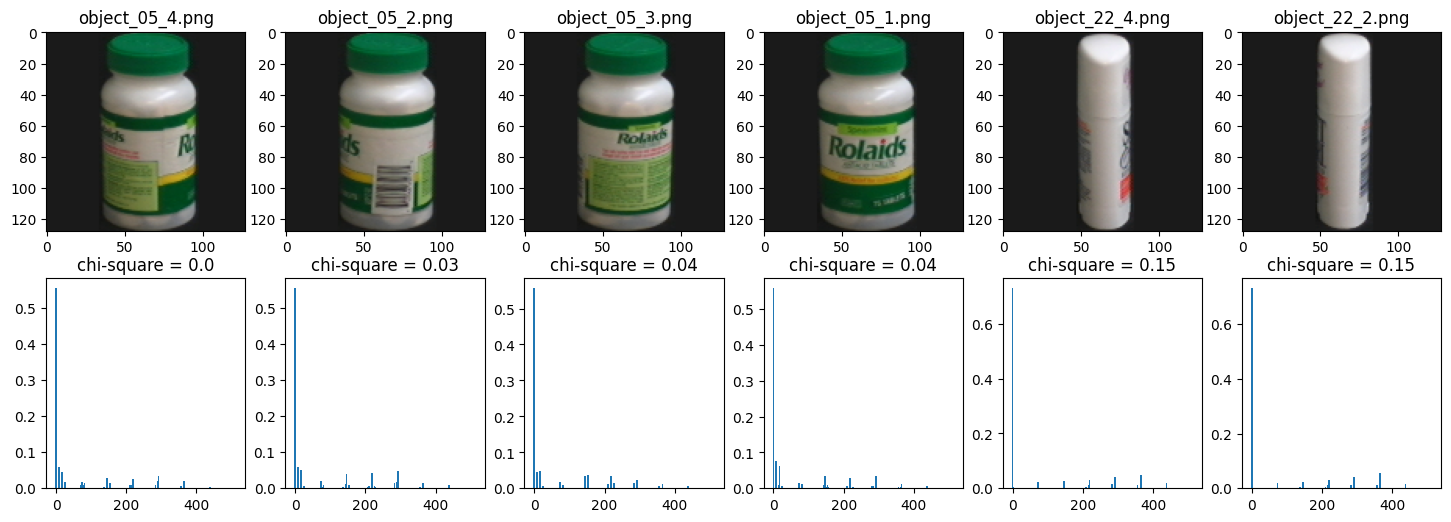

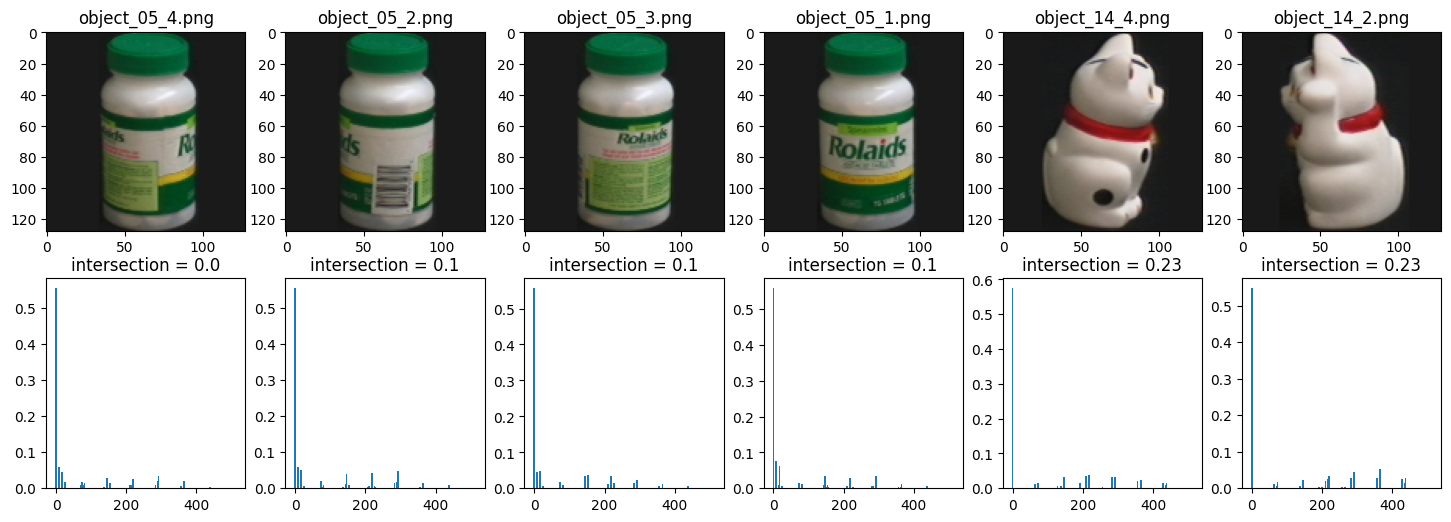

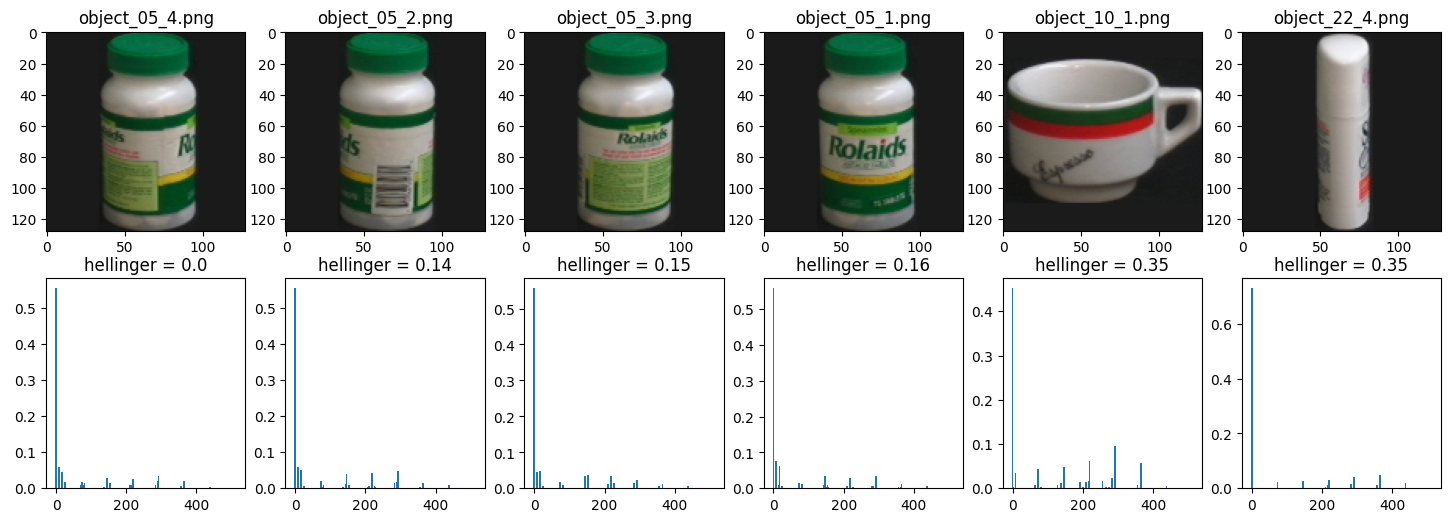

In [91]:
methods = ["l2", "chi-square", "intersection", "hellinger"]
sorted_by_distance = {}
for method in methods:
    #sort by distance from this method
    sorted_by_distance[method] = list(sorted(distances_from_selected.items(), key=lambda item: item[1][method]))
    #plot
    plt.figure(figsize=(18,6))
    ln_wid = 5
    for i in range(0,6):
        curr_name = sorted_by_distance[method][i][0]
        plt.subplot(2,6,i+1)
        plt.imshow(histograms_data[curr_name]["image"])
        plt.title(curr_name)
        curr_hist = histograms_data[curr_name]["hist1d"]
        plt.subplot(2,6,i+6+1)
        plt.bar(range(len(curr_hist)), curr_hist, width=ln_wid)
        plt.title("{} = {}".format(method, round(sorted_by_distance[method][i][1][method],2)))
    plt.show()

#### (e)

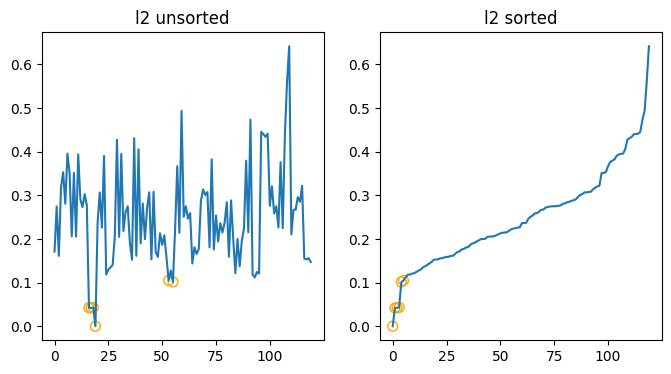

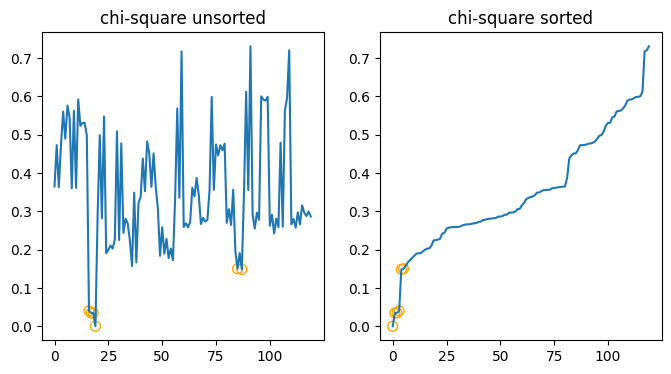

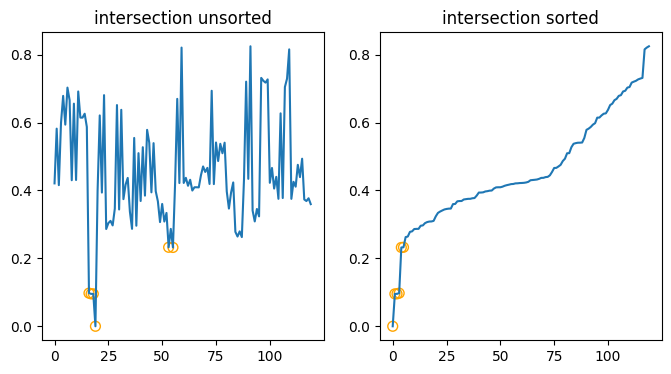

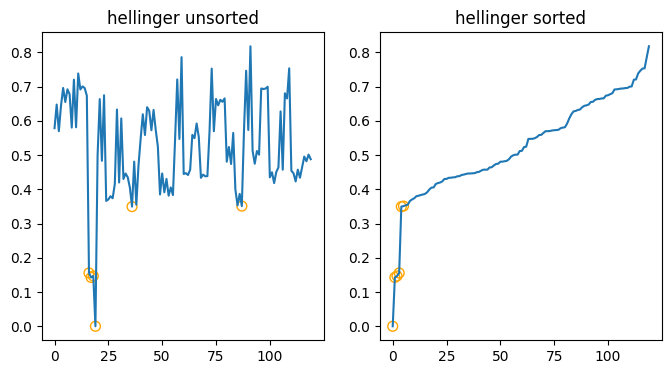

In [92]:
n_items_tocircle = 6
for displayed_method in methods:
    points_circle_sorted = [(i, sorted_by_distance[displayed_method][i][1][displayed_method]) for i in range(n_items_tocircle)]
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(range(len(distances_from_selected)), [i[displayed_method] for i in distances_from_selected.values()])
    plt.title(displayed_method + " unsorted")
    temp_list_elements = list(distances_from_selected.items())
    temp_list_tocircle = [sorted_by_distance[displayed_method][i][0] for i in range(n_items_tocircle)]
    for i in range(len(temp_list_elements)):
        if(temp_list_elements[i][0] in temp_list_tocircle):
            plt.scatter(*(i, temp_list_elements[i][1][displayed_method]), s=50, edgecolors='orange', facecolors='none', linewidth=1)
    plt.subplot(1,2,2)
    plt.plot(range(len(sorted_by_distance[displayed_method])), [i[1][displayed_method] for i in sorted_by_distance[displayed_method]])
    plt.title(displayed_method + " sorted")
    for p in points_circle_sorted:
        plt.scatter(*p, s=50, edgecolors='orange', facecolors='none', linewidth=1)
    plt.show()

#### (f)

In [93]:
histograms_sum = np.zeros(len(list(histograms_data.items())[0][1]["hist1d"]))
for k, v in histograms_data.items():
    histograms_sum = histograms_sum + v["hist1d"]
# histograms_sum = histograms_sum/np.sum(histograms_sum)

histograms_sum_3d = np.zeros(len(list(histograms_data.items())[0][1]["hist3d"]))
for k, v in histograms_data.items():
    histograms_sum_3d = histograms_sum_3d + v["hist3d"]

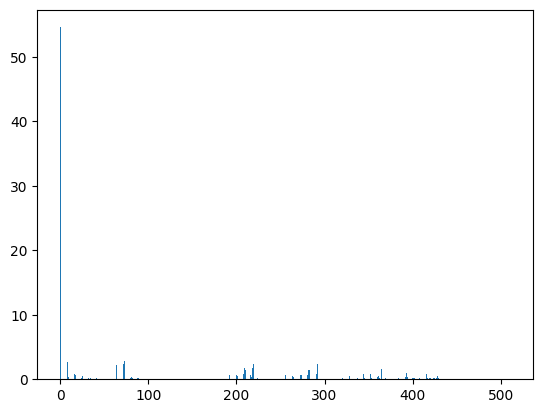

In [94]:
plt.bar(range(len(histograms_sum)), histograms_sum)
plt.show()

In [95]:
l=0.3
weights = np.exp(-l*histograms_sum)


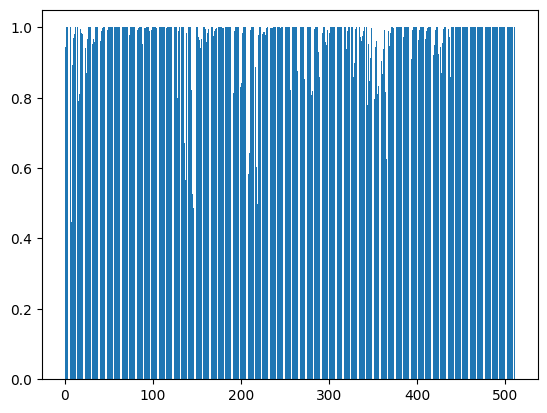

In [96]:
plt.bar(range(len(weights)), weights)
plt.show()

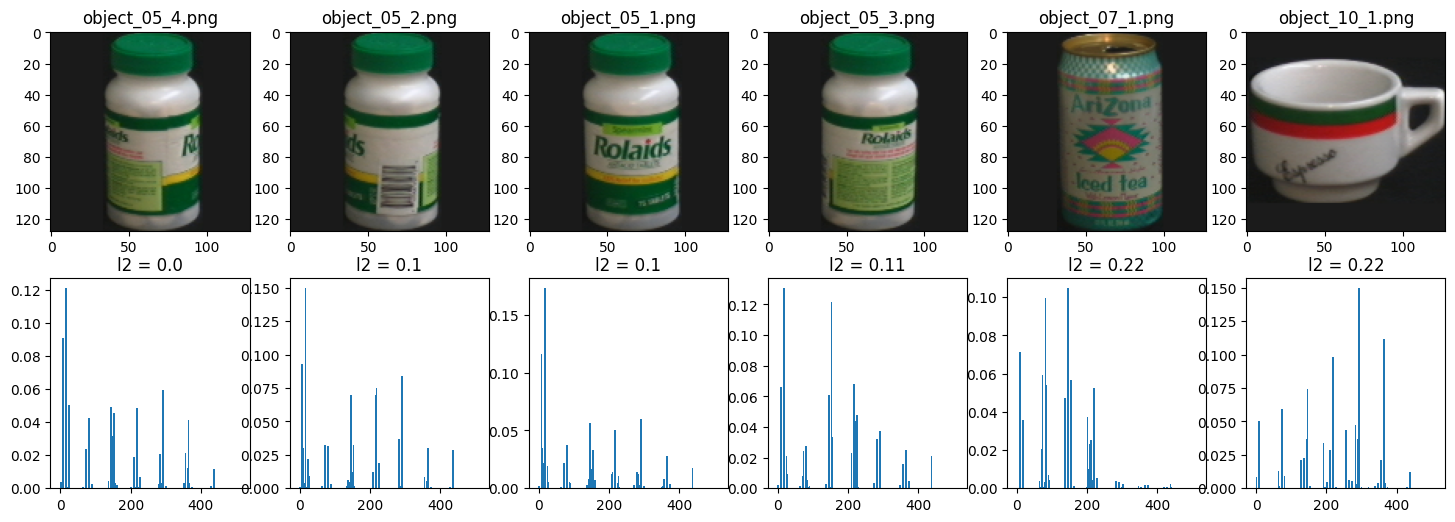

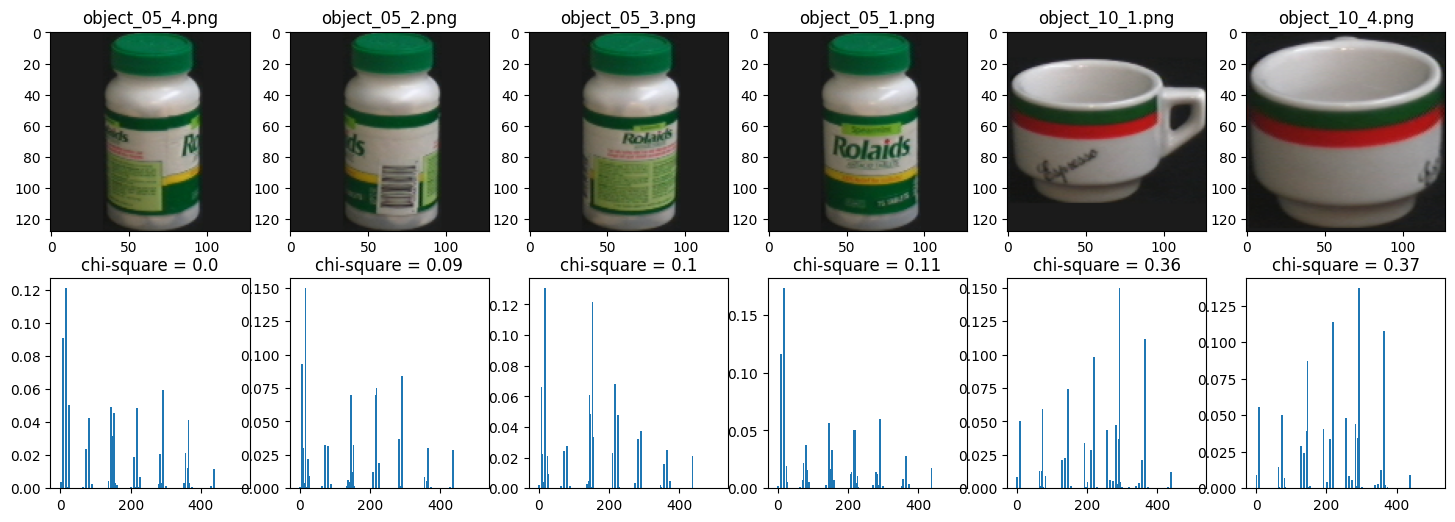

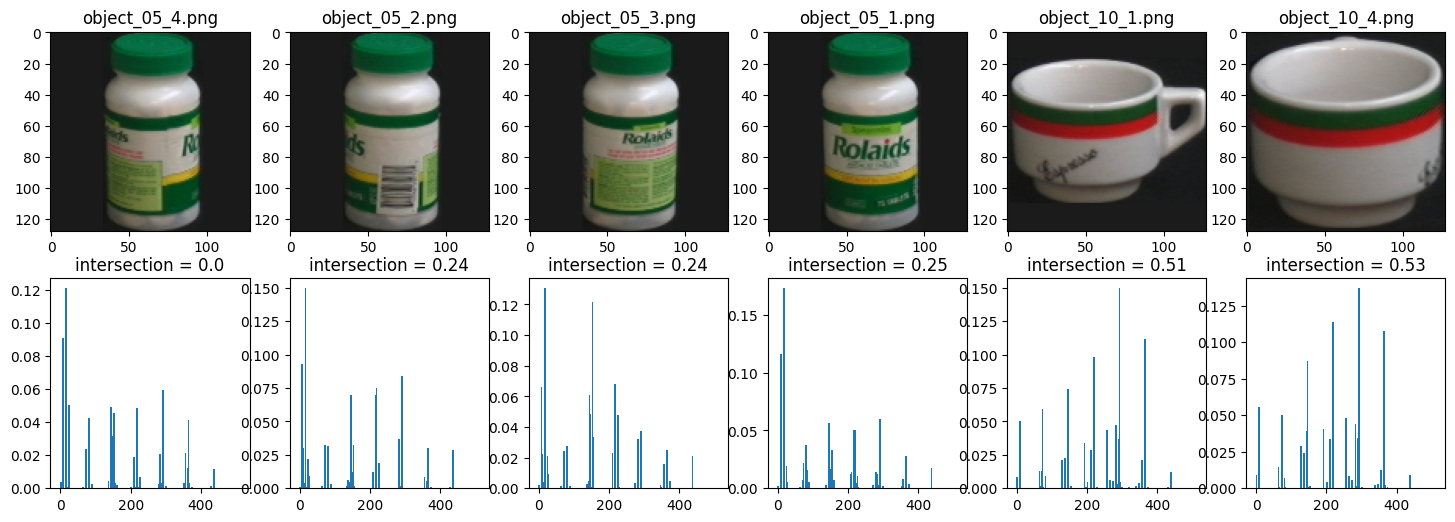

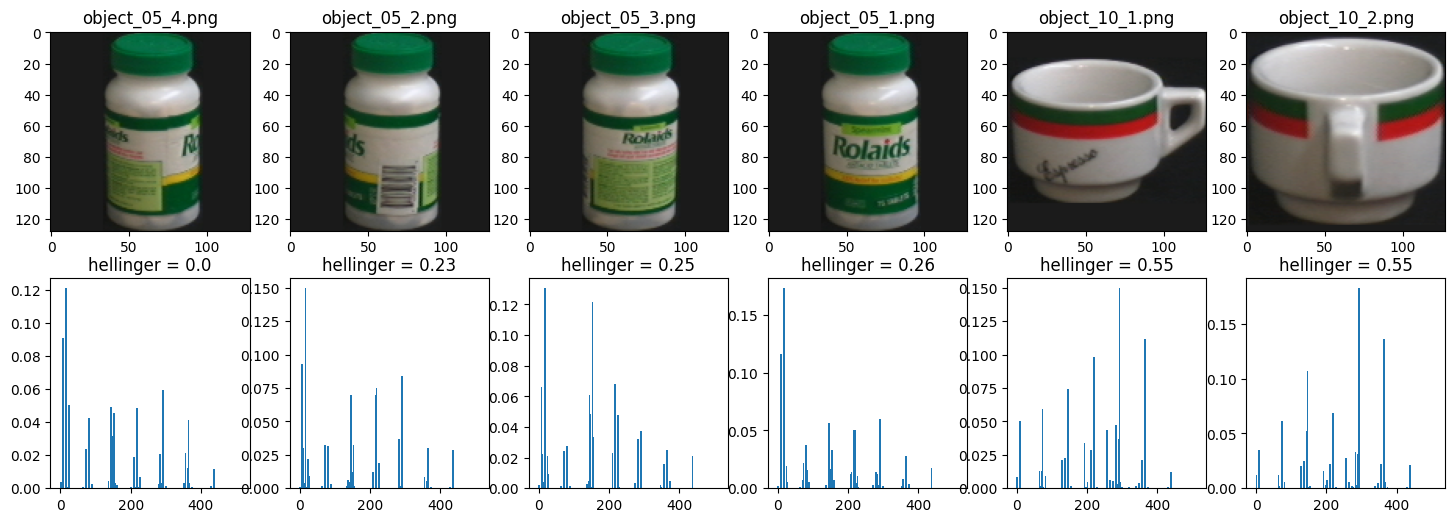

In [97]:
for k, v in histograms_data.items():
    v["hist1d"] = v["hist1d"] * weights
    v["hist1d"] = v["hist1d"]/np.sum(v["hist1d"])

selected_image = "object_05_4.png" 

#init new dict with same keys - file names - but for holding distances to the selected image
distances_from_selected = dict.fromkeys(histograms_data)
#iterate over the file names and for each file compute all distances to the selected file
for filename in distances_from_selected:
    #init struct for distances for this instance
    distances_object = {
        "l2" : -1,
        "chi-square" : -1,
        "intersection" : -1,
        "hellinger" : -1
    }
    #this could be in a for loop over the method names, but i feel like this way is more readable and its already spaghetti
    distances_object["l2"] = compare_histograms(histograms_data[selected_image]["hist1d"], histograms_data[filename]["hist1d"], "l2")
    distances_object["chi-square"] = compare_histograms(histograms_data[selected_image]["hist1d"], histograms_data[filename]["hist1d"], "chi-square")
    distances_object["intersection"] = compare_histograms(histograms_data[selected_image]["hist1d"], histograms_data[filename]["hist1d"], "intersection")
    distances_object["hellinger"] = compare_histograms(histograms_data[selected_image]["hist1d"], histograms_data[filename]["hist1d"], "hellinger")
    #put it in the main struct
    distances_from_selected[filename] = distances_object

methods = ["l2", "chi-square", "intersection", "hellinger"]
sorted_by_distance = {}
for method in methods:
    #sort by distance from this method
    sorted_by_distance[method] = list(sorted(distances_from_selected.items(), key=lambda item: item[1][method]))
    #plot
    plt.figure(figsize=(18,6))
    ln_wid = 5
    for i in range(0,6):
        curr_name = sorted_by_distance[method][i][0]
        plt.subplot(2,6,i+1)
        plt.imshow(histograms_data[curr_name]["image"])
        plt.title(curr_name)
        curr_hist = histograms_data[curr_name]["hist1d"]
        plt.subplot(2,6,i+6+1)
        plt.bar(range(len(curr_hist)), curr_hist, width=ln_wid)
        plt.title("{} = {}".format(method, round(sorted_by_distance[method][i][1][method],2)))
    plt.show()